# Разведочный анализ данных

Исследование проводится на датасете с характеристиками морских ушек (abalones).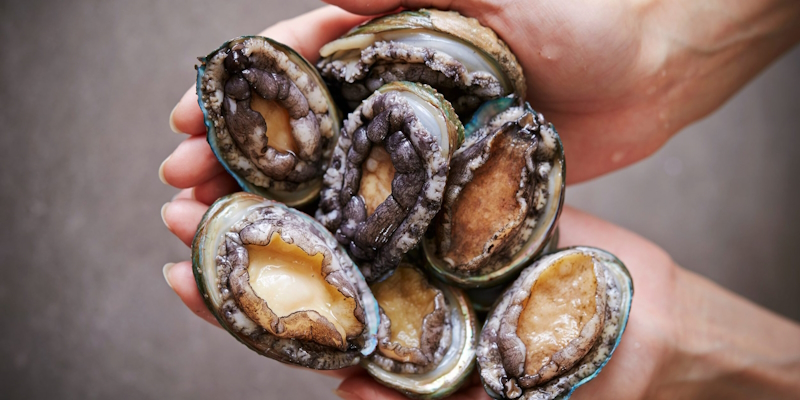

*Task: Predict the age of abalone from physical measurements.*

**Sex** - nominal - M, F, and I (infant)

**Length** - continuous - mm - Longest shell measurement

**Diameter** - continuous - mm - perpendicular to length

**Height** - continuous - mm - with meat in shell

**Whole weight** - continuous - grams - whole abalone

**Shucked weight** - continuous - grams - weight of meat

**Viscera weight** - continuous - grams - gut weight (after bleeding)

**Shell weight** - continuous - grams - after being dried

**Rings** - integer - +1.5 gives the age in years (target)

[Link](https://archive.ics.uci.edu/dataset/1/abalone) to the description of the original dataset.

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
ABALONE_DATASET = "https://raw.githubusercontent.com/aiedu-courses/stepik_eda_and_dev_tools/main/datasets/abalone.csv"

In [3]:
df = pd.read_csv(ABALONE_DATASET)

**Общее исследование данных.**

In [4]:
df.head()

,Sex,Length,Diameter,Height,Whole weight,Shucked weight,Viscera weight,Shell weight,Rings
0,M,0.455,0.365,0.095,0.5140,0.2245,0.1010,0.150,15
1,M,0.350,0.265,0.090,0.2255,0.0995,0.0485,0.070,7
2,F,0.530,0.420,0.135,0.6770,0.2565,0.1415,0.210,9
3,M,0.440,0.365,0.125,NaN,0.2155,0.1140,0.155,10
4,I,0.330,0.255,0.080,0.2050,0.0895,0.0395,0.055,7


In [5]:
print('Число строк: ', df.shape[0], '\nЧисло столбцов: ', df.shape[1])

Число строк:  4177 
Число столбцов:  9


In [6]:
df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 4177 entries, 0 to 4176
Data columns (total 9 columns):
 #   Column          Non-Null Count  Dtype  
---  ------          --------------  -----  
 0   Sex             4177 non-null   object 
 1   Length          4177 non-null   float64
 2   Diameter        4078 non-null   float64
 3   Height          4177 non-null   float64
 4   Whole weight    4078 non-null   float64
 5   Shucked weight  4177 non-null   float64
 6   Viscera weight  4177 non-null   float64
 7   Shell weight    4127 non-null   float64
 8   Rings           4177 non-null   int64  
dtypes: float64(7), int64(1), object(1)
memory usage: 293.8+ KB


In [7]:
df.isnull().mean() * 100

Sex               0.000000
Length            0.000000
Diameter          2.370122
Height            0.000000
Whole weight      2.370122
Shucked weight    0.000000
Viscera weight    0.000000
Shell weight      1.197031
Rings             0.000000
dtype: float64

Наблюдаем пропуски в данных о диаметре раковины, весе полного морского ушка и весе раковины.

In [8]:
df.duplicated().sum()

0

Строки-дубликаты в данных отсутствуют.

Для удобства работы с данными изменим названия колонок.

In [9]:
df.columns = df.columns.str.lower().str.replace(' ', '_')

In [10]:
df.columns

Index(['sex', 'length', 'diameter', 'height', 'whole_weight', 'shucked_weight',
       'viscera_weight', 'shell_weight', 'rings'],
      dtype='object')

Создадим целевую переменную 'age' и удалим колонку 'rings'.

In [11]:
df['age'] = df['rings'] + 1.5

In [12]:
df = df.drop(columns=['rings'])

**Однофакторный анализ.**

In [13]:
df.describe(include='all')

,sex,length,diameter,height,whole_weight,shucked_weight,viscera_weight,shell_weight,age
count,4177,4177.000000,4078.000000,4177.000000,4078.000000,4177.000000,4177.000000,4127.000000,4177.000000
unique,4,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
top,M,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
freq,1447,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
mean,NaN,0.523992,0.407840,0.139516,0.827306,0.359367,0.180594,0.239072,11.433684
std,NaN,0.120093,0.099286,0.041827,0.490348,0.221963,0.109614,0.138942,3.224169
min,NaN,0.075000,0.055000,0.000000,0.002000,0.001000,0.000500,0.001500,2.500000
25%,NaN,0.450000,0.350000,0.115000,0.440500,0.186000,0.093500,0.130000,9.500000
50%,NaN,0.545000,0.425000,0.140000,0.798500,0.336000,0.171000,0.235000,10.500000
75%,NaN,0.615000,0.480000,0.165000,1.150875,0.502000,0.253000,0.328250,12.500000


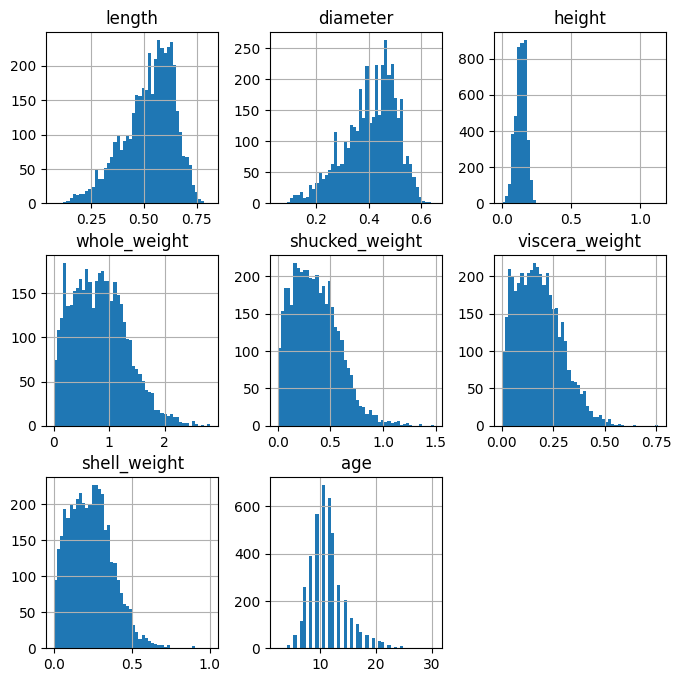

In [14]:
df.hist(bins=50, figsize=(8,8));

У распределений наблюдается асимметрия: смещения либо в правую, либо в левую сторону. Вероятно, присутствуют выбросы в множестве значений параметра 'height'.

Заменим пропуски медианными значениями параметров.

In [15]:
median_diameter = df['diameter'].median()
median_whole_weight = df['whole_weight'].median()
median_shell_weight = df['shell_weight'].median()

df['diameter'].fillna(median_diameter, inplace=True)
df['whole_weight'].fillna(median_whole_weight, inplace=True)
df['shell_weight'].fillna(median_shell_weight, inplace=True)

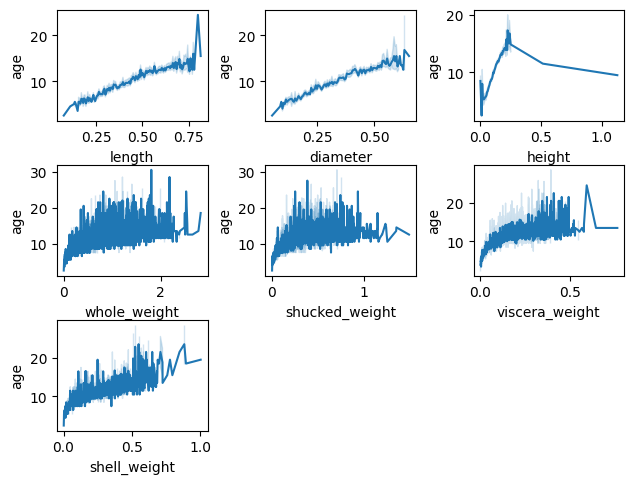

In [16]:
fig, axs = plt.subplots(nrows=3, ncols=3)
fig.tight_layout()

sns.lineplot(data=df, x="length", y="age",  ax=axs[0, 0])
sns.lineplot(data=df, x="diameter", y="age",  ax=axs[0, 1])
sns.lineplot(data=df, x="height", y="age",  ax=axs[0, 2])
sns.lineplot(data=df, x="whole_weight", y="age",  ax=axs[1, 0])
sns.lineplot(data=df, x="shucked_weight", y="age",  ax=axs[1, 1])
sns.lineplot(data=df, x="viscera_weight", y="age",  ax=axs[1, 2])
sns.lineplot(data=df, x="shell_weight", y="age",  ax=axs[2, 0])

fig.delaxes(axs[2][1])
fig.delaxes(axs[2][2])

В целом наблюдается тенденция "чем больше параметр, тем больше целевая переменная". Заметное исключение представляет взаимосвязь 'height' и 'age': до 0.25 мм высоты наблюдается увеличение возраста, после 0.25 мм - снижение.

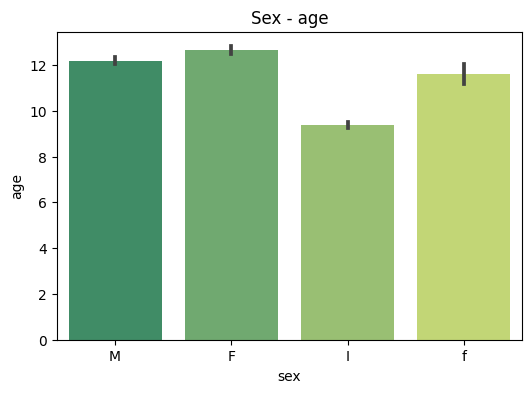

In [17]:
plt.figure(figsize=(6,4))

sns.barplot(x='sex', y='age', data = df, palette='summer')
plt.title('Sex - age')
plt.show();

Наблюдаем ошибочное обозначение женского пола морского ушка в данных (вместо большой буквы 'F' есть ещё маленькая 'f'). Заменим обозначение.

In [18]:
df['sex'] = df['sex'].replace({'f': 'F'})

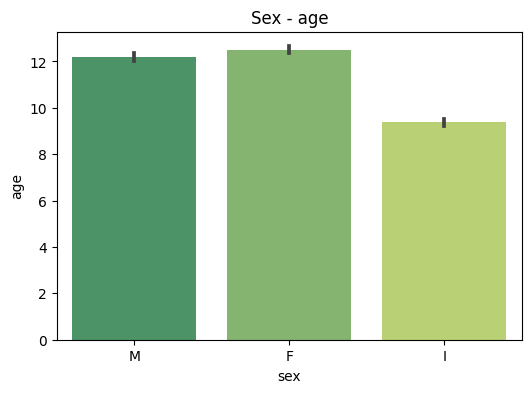

In [19]:
plt.figure(figsize=(6,4))

sns.barplot(x='sex', y='age', data = df, palette='summer')
plt.title('Sex - age')
plt.show();

В среднем возраст морских ушек мужского и женского пола одинаков, около 12 лет. Среднее значение возраста молодых морских ушек составляет приблизительно 9 лет.

In [20]:
df.groupby('sex')['age'].mean()

sex
F    12.501376
I     9.372257
M    12.178645
Name: age, dtype: float64

**Корреляции.**

<ipython-input-21-45c7a418bf54>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr()


<Axes: >

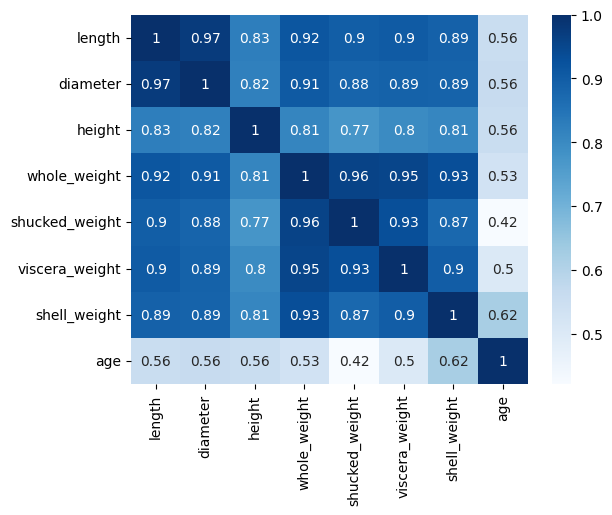

In [21]:
# Корреляция Пирсона (линейная взаимосвязь)

corr = df.corr()

sns.heatmap(corr, cmap="Blues", annot=True)

Рассмотрим нецелевые переменные. Наблюдаем положительную корреляцию между всеми 7 параметрами (коэффициенты корреляции > 0.8). Несколько меньше коррелирует высота раковины с остальными 6 переменными.
Целевая переменная немного сильнее остальных коррелирует с весом раковины ('shell_weight'), меньше всего - с весом мяса ('shucked_weight').

<ipython-input-22-8cef2eba56fc>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='spearman')


<Axes: >

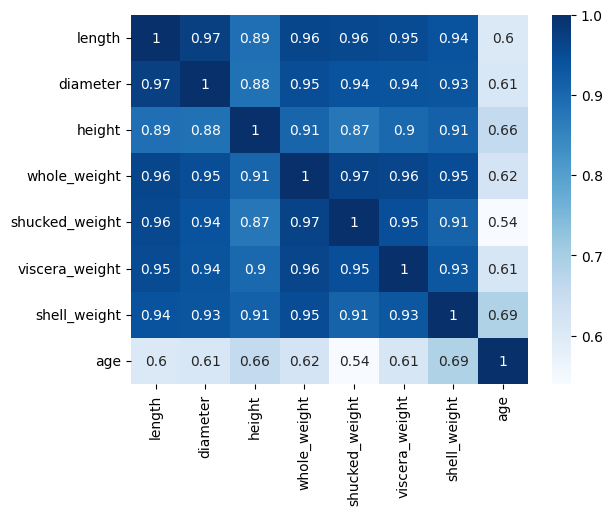

In [22]:
# Корреляция Спирмена (степень монотонной связи)

corr = df.corr(method='spearman')

sns.heatmap(corr, cmap="Blues", annot=True)

Рассмотрим нецелевые переменные. Наблюдаем положительную корреляцию между всеми 7 параметрами (коэффициенты корреляции > 0.8). Несколько меньше коррелирует высота раковины с остальными 6 переменными.
Целевая переменная немного сильнее остальных коррелирует с весом раковины ('shell_weight'), меньше всего - с весом мяса ('shucked_weight').

<ipython-input-23-9ac174114324>:3: FutureWarning: The default value of numeric_only in DataFrame.corr is deprecated. In a future version, it will default to False. Select only valid columns or specify the value of numeric_only to silence this warning.
  corr = df.corr(method='kendall')


<Axes: >

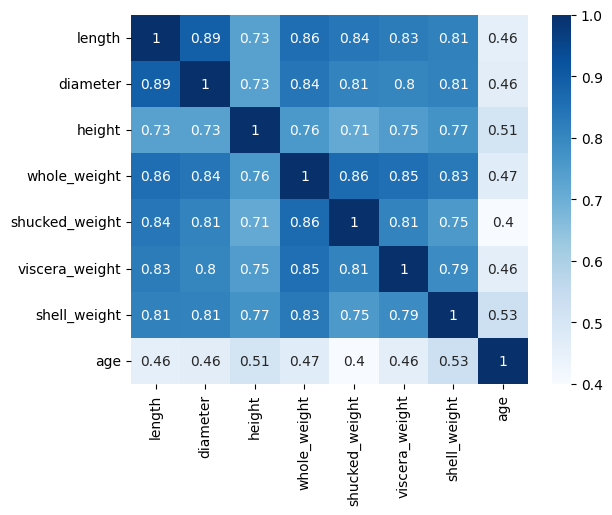

In [23]:
# Корреляция Кендалла

corr = df.corr(method='kendall')

sns.heatmap(corr, cmap="Blues", annot=True)

Рассмотрим нецелевые переменные. Наблюдаем положительную корреляцию между всеми 7 параметрами (коэффициенты корреляции > 0.7). Несколько меньше коррелирует высота раковины с остальными 6 переменными.
Целевая переменная немного сильнее остальных коррелирует с весом раковины ('shell_weight'), меньше всего - с весом мяса ('shucked_weight').

In [24]:
# ANOVA

from scipy.stats import f_oneway

Data = []

for c1 in df.columns:
    for c2 in df.columns:
        if df[c1].dtype == 'object' and df[c2].dtype != 'object':
            CategoryGroupLists = df.groupby(c1)[c2].apply(list)
            AnovaResults = f_oneway(*CategoryGroupLists)

            if AnovaResults[1] >= 0.05:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'No'})
            else:
                Data.append({'Category' : c1, 'Numerical' : c2, 'Is correlated' : 'Yes'})

AnovaRes = pd.DataFrame.from_dict(Data)
AnovaRes

,Category,Numerical,Is correlated
0,sex,length,Yes
1,sex,diameter,Yes
2,sex,height,Yes
3,sex,whole_weight,Yes
4,sex,shucked_weight,Yes
5,sex,viscera_weight,Yes
6,sex,shell_weight,Yes
7,sex,age,Yes


Проведя измерение связи между числовыми признаками и категориальным признаком 'sex', получили корреляцию всех признаков с полом морского ушка.


**Анализ целевой переменной.**

<Axes: xlabel='age', ylabel='Count'>

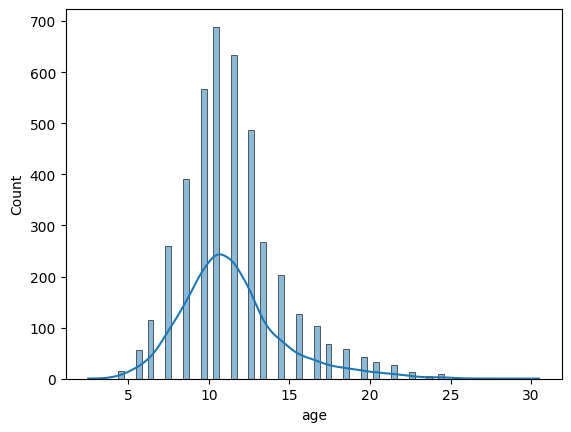

In [25]:
sns.histplot(data = df['age'], kde = True)

Мы видим у распределения длинный правый хвост, который может быть трудно прогнозируем моделями (так как там мало значений).

In [26]:
# сохранение обработанного датасета

from google.colab import drive

drive.mount('/content/drive', force_remount=True)

filename = 'abalone.csv'

df.to_csv('/content/drive/MyDrive/' + filename, index=False)

Mounted at /content/drive
